In [1]:
with open('201511291739-Copy1.dat') as f:
    lines = f.readlines()
b = list()
print("number of data points are", len(lines))
for i, l in enumerate(lines):
    a = [float(x) for x in l.strip().split(' ')]
    #print(a)
    alt_diff = a[3] - a[1]
    az_diff = a[2] - a[0]
    a.extend([alt_diff, az_diff]) # diff is observed - catalogue (left catalogue, right observed)
    b.append(a)

number of data points are 61


In [2]:
with open('trainingset.csv', 'w') as f:
    print("catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff", file=f)
    for i, row in enumerate(b):
        print(','.join([str(entry) for entry in row]), file=f)
        if i ==40:
            break
print('saved training file')
with open('testset.csv', 'w') as f:
    print("catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff", file=f)
    for row in b[41:]:
        print(','.join([str(entry) for entry in row]), file=f)
print('saved test file')

saved training file
saved test file


In [3]:
import pandas as pd
df = pd.read_csv('trainingset.csv')
df.head()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
0,321.943317,65.140715,322.798050,65.123063,-0.017652,0.854733
1,299.520591,61.034865,300.371422,61.022245,-0.012620,0.850831
2,313.308741,51.468686,314.147220,51.451696,-0.016990,0.838479
3,290.584998,51.775686,291.424639,51.764533,-0.011153,0.839641
4,280.146706,40.100441,280.977860,40.091546,-0.008895,0.831154


In [4]:
df.shape
df.dtypes
import matplotlib.pyplot as plt
import numpy as np

lat = 29.361232 # degrees
get_dec_from_alt = lambda alt, azm, lat : np.degrees(np.arcsin(np.sin(alt)*np.sin(lat)+np.cos(alt)*np.cos(azm)*np.cos(lat)))
obs_dec = get_dec_from_alt(*list(map(np.radians, [df.obs_alt,df.obs_az,lat])))

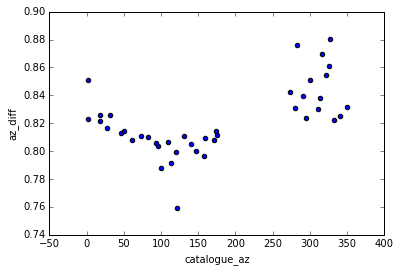

In [5]:
df.plot.scatter(x='catalogue_az', y='az_diff')
plt.show()

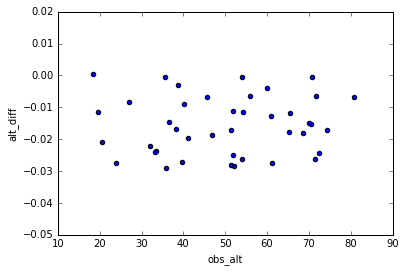

In [6]:
df.plot.scatter(x='obs_alt', y='alt_diff')
plt.show()

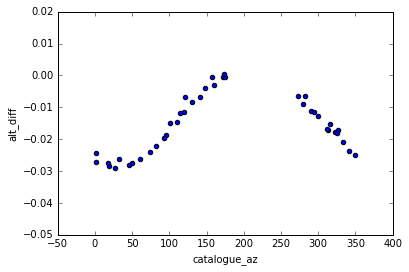

In [7]:
df.plot.scatter(x='catalogue_az', y='alt_diff')
plt.show()

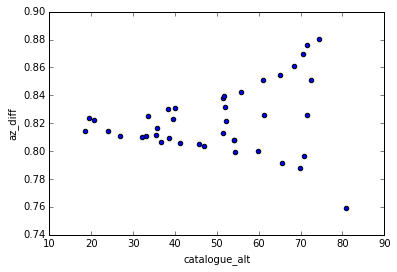

In [8]:
df.plot.scatter(x='catalogue_alt', y='az_diff')
plt.show()

In [9]:
df.describe()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,172.561444,49.920428,173.383596,49.904817,-0.015611,0.822152
std,115.863462,16.977601,115.876888,16.978053,0.009070,0.024621
min,1.110432,18.389042,1.961796,18.389464,-0.029158,0.759347
25%,82.249012,36.674050,83.059016,36.659356,-0.024052,0.807679
50%,147.133974,51.775686,147.933937,51.764533,-0.016859,0.816589
75%,294.893625,65.140715,295.717277,65.123063,-0.008445,0.831450
max,349.392101,80.745721,350.223551,80.738942,0.000422,0.880618


In [10]:
df.corr()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
catalogue_az,1.000000,0.024698,1.000000,0.024871,0.325689,0.545227
catalogue_alt,0.024698,1.000000,0.024742,1.000000,0.049611,0.218616
obs_az,1.000000,0.024742,1.000000,0.024915,0.325617,0.545376
obs_alt,0.024871,1.000000,0.024915,1.000000,0.050144,0.218524
alt_diff,0.325689,0.049611,0.325617,0.050144,1.000000,-0.161170
az_diff,0.545227,0.218616,0.545376,0.218524,-0.161170,1.000000


In [11]:
from sklearn import linear_model, metrics

In [12]:
X1 = -1.0/np.cos(np.radians(list(df['obs_alt'])))
X2 = -1.0*np.tan(np.radians(list(df['obs_alt'])))
X3 = np.cos(np.radians(list(df['obs_az']))) * np.tan(np.radians(list(df['obs_alt'])))
X4 = np.sin(np.radians(list(df['obs_az']))) * np.tan(np.radians(list(df['obs_alt'])))
X5 = np.cos(2.0*np.radians(list(df['obs_az'])))
X = np.array([X1, X2, X3, X4, X5])
X = X.T
print(X.shape)
df2 = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
df2.head()

(41, 5)


,X1,X2,X3,X4,X5
0,-2.377156,-2.156588,1.717743,-1.303930,0.268854
1,-2.064111,-1.805701,0.912969,-1.557897,-0.488730
2,-1.604688,-1.254999,0.874112,-0.900528,-0.029763
3,-1.615784,-1.269156,0.463594,-1.181456,-0.733145
4,-1.307161,-0.841826,0.160309,-0.826421,-0.927473


In [13]:
df.head()

,catalogue_az,catalogue_alt,obs_az,obs_alt,alt_diff,az_diff
0,321.943317,65.140715,322.798050,65.123063,-0.017652,0.854733
1,299.520591,61.034865,300.371422,61.022245,-0.012620,0.850831
2,313.308741,51.468686,314.147220,51.451696,-0.016990,0.838479
3,290.584998,51.775686,291.424639,51.764533,-0.011153,0.839641
4,280.146706,40.100441,280.977860,40.091546,-0.008895,0.831154


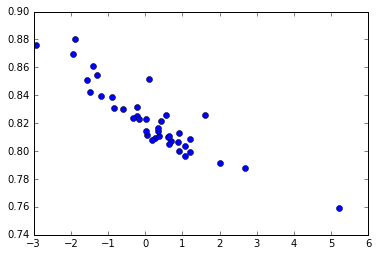

In [14]:
plt.plot(X4, df.az_diff, 'bo')
plt.show()

In [15]:
y = np.array(df.az_diff)
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predicted_training = regr.predict(X)

In [16]:
regr.coef_

array([-0.01384457,  0.0062163 ,  0.00678738, -0.01385585, -0.00034571])

In [17]:
regr.intercept_

0.80538483370234704

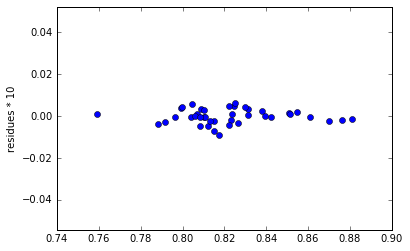

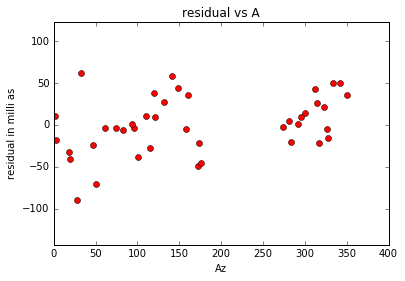

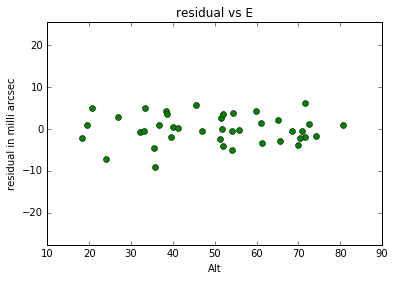

In [18]:
plt.plot(y_predicted_training, (y - y_predicted_training)*10, 'bo')
plt.ylabel("residues * 10")
plt.axis('equal')
plt.show()


# Residual analysis to improve TRAIN MODEL
plt.plot(df.obs_az, (y-y_predicted_training)*100000, 'ro')
plt.axis('equal')
plt.title('residual vs A')
plt.xlabel('Az')
plt.ylabel('residual in milli as')
plt.show()

plt.plot(df.obs_alt, (y-y_predicted_training)*10000, 'go')
plt.axis('equal')
plt.title('residual vs E')
plt.xlabel('Alt')
plt.ylabel('residual in milli arcsec')
plt.show()

In [19]:
regr.score(X, y) # Gives R^2 (no easy way in sklearn for p-value and F-statistic)

0.99980337916034023

In [20]:
RSS = np.sum(np.square(y - y_predicted_training))
regr.residues_

/usr/local/lib/python3.4/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


4.7676479997005115e-06

In [21]:
RSE = np.sqrt(RSS/(41-4-1)) # RSE = sqrt(RSS/(n-p-1))
print(RSE)

0.000363915741152


In [22]:
metrics.r2_score(y, y_predicted_training)

0.99980337916034023

In [23]:
from sklearn import feature_selection
feature_selection.f_regression(X,y)

(array([  8.80974514e-02,   2.12940534e-01,   6.60935458e+01,
          1.70378169e+02,   5.84213579e-01]),
 array([  7.68185006e-01,   6.47035875e-01,   6.35783181e-10,
          8.19571732e-16,   4.49265537e-01]))

In [24]:
TSS = np.sum(np.square(y-np.mean(y)))
f_stat = ((TSS-RSS)/4)/(RSS/(41-4-1))
print(f_stat)
regr.coef_

45764.3779165


array([-0.01384457,  0.0062163 ,  0.00678738, -0.01385585, -0.00034571])

RSS is :  3.60620103781e-05
RSE is :  0.00155052701531
R^2 score is :  0.995722772137
TSS is :  0.00843116418775
F-statistic is :  872.986082447


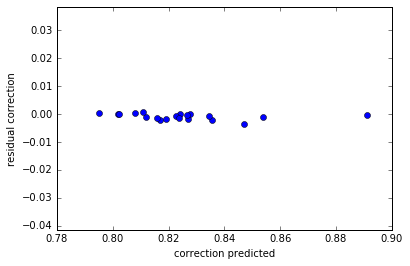

In [25]:
# repeating above steps for test file - t suffix is for test
# here we use catalogue values to find out corrections in encoder values then compare with
# what encoder actually had for the star to assess accuracy of the fit
dft = pd.read_csv('testset.csv')
X1t = -1.0/np.cos(np.radians(list(dft['catalogue_alt'])))
X2t = -1.0*np.tan(np.radians(list(dft['catalogue_alt'])))
X3t = np.cos(np.radians(list(dft['catalogue_az']))) * np.tan(np.radians(list(dft['catalogue_alt'])))
X4t = np.sin(np.radians(list(dft['catalogue_az']))) * np.tan(np.radians(list(dft['catalogue_alt'])))
X5t = np.cos(2.0*np.radians(list(dft['catalogue_az'])))
Xt = np.array([X1t, X2t, X3t, X4t, X5t])
Xt = Xt.T
#print(Xt.shape)
yt = np.array(dft.az_diff)

y_predicted_test = regr.predict(Xt)

RSS = np.sum(np.square(yt - y_predicted_test))
print("RSS is : ", RSS)
RSE = np.sqrt(RSS/(20-4-1)) # RSE = sqrt(RSS/(n-p-1))
print("RSE is : ", RSE)
print("R^2 score is : ", regr.score(Xt,yt))
TSS = np.sum(np.square(yt - np.mean(yt)))
print("TSS is : ", TSS)
f_stat = ((TSS-RSS)/4)/(RSS/(20-4-1))
print("F-statistic is : ", f_stat)
plt.plot(y_predicted_test, yt - y_predicted_test, 'bo')
plt.axis('equal')
plt.xlabel('correction predicted')
plt.ylabel('residual correction')
plt.show()

In [26]:
RMS = np.sqrt(RSS/20)
print("RMS of azimuth in arcsec", RMS*3600) # Accuracy of azimuth in arc seconds

# horizontal distance inaccuracy
cos_alt = np.cos(dft.catalogue_alt)
dist_h = yt*cos_alt
dist_h_predicted = y_predicted_test * cos_alt

dist_h_RMS = np.sqrt(np.mean(np.square(dist_h - dist_h_predicted)))
print("RMS of horizontal dist in arc sec",dist_h_RMS*3600)

RMS of azimuth in arcsec 4.83406482425
RMS of horizontal dist in arc sec 2.29829256398


In [27]:
df2.head()

,X1,X2,X3,X4,X5
0,-2.377156,-2.156588,1.717743,-1.303930,0.268854
1,-2.064111,-1.805701,0.912969,-1.557897,-0.488730
2,-1.604688,-1.254999,0.874112,-0.900528,-0.029763
3,-1.615784,-1.269156,0.463594,-1.181456,-0.733145
4,-1.307161,-0.841826,0.160309,-0.826421,-0.927473


Summary for training set

RSS is :  6.31589129421e-07
RSE is :  0.00013245430338
R^2 score is :  0.999808042694
TSS is :  0.00329025835878
F-statistic is :  46876.4257453


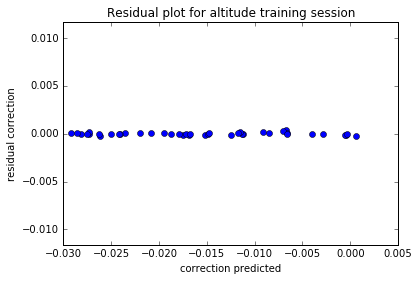

Summary for test set

RSS is :  6.8999412712e-06
RSE is :  0.000678230111944
R^2 score is :  0.994491335793
TSS is :  0.0012525616032
F-statistic is :  676.995795852


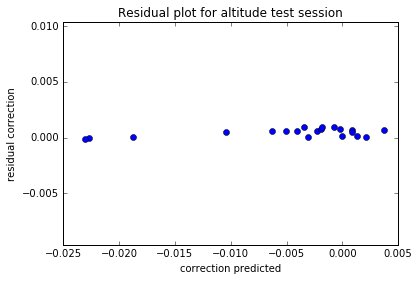

RMS of alt in arcsec 2.1145122236
RMS of vertcial dist in arc sec 2.1145122236


In [28]:
# train model for altitude now
W1 = -1.0*np.sin(np.radians(list(df['obs_az'])))
W2 = np.cos(np.radians(list(df['obs_az'])))
# Adding tube flexure
W3 = np.cos(np.radians(list(df['obs_alt'])))
# Adding harmonics
W4 = np.sin(2.0*np.radians(list(df['obs_alt'])))
W5 = np.sin(2.0*np.radians(list(df['obs_az'])))
W = np.array([W1, W2, W3, W4, W5])
W = W.T

z = np.array(df.alt_diff)

regr2 = linear_model.LinearRegression()
regr2.fit(W, z)
z_predicted_training = regr2.predict(W)

###########################################
print("Summary for training set\n")
RSS = np.sum(np.square(z - z_predicted_training))
print("RSS is : ", RSS)
RSE = np.sqrt(RSS/(41-4-1)) # RSE = sqrt(RSS/(n-p-1))
print("RSE is : ", RSE)
print("R^2 score is : ", regr2.score(W,z))
TSS = np.sum(np.square(z - np.mean(z)))
print("TSS is : ", TSS)
f_stat = ((TSS-RSS)/4)/(RSS/(41-4-1))
print("F-statistic is : ", f_stat)
plt.plot(z_predicted_training, z - z_predicted_training, 'bo')
plt.axis('equal')
plt.title('Residual plot for altitude training session')
plt.xlabel('correction predicted')
plt.ylabel('residual correction')
plt.show()
###########################################

# testing on rest of the data
W1t = -1.0*np.sin(np.radians(list(dft['catalogue_az'])))
W2t = np.cos(np.radians(list(dft['catalogue_az'])))
W3t = np.cos(np.radians(list(dft['catalogue_alt'])))
W4t = np.sin(2.0*np.radians(list(dft['catalogue_alt'])))
W5t = np.sin(2.0*np.radians(list(dft['catalogue_az'])))
Wt = np.array([W1t, W2t, W3t, W4t, W5t])
Wt = Wt.T

zt = np.array(dft.alt_diff)
#predict
z_predicted_test= regr2.predict(Wt)

###########################################
print("Summary for test set\n")
RSS = np.sum(np.square(zt - z_predicted_test))
print("RSS is : ", RSS)
RSE = np.sqrt(RSS/(20-4-1)) # RSE = sqrt(RSS/(n-p-1))
print("RSE is : ", RSE)
print("R^2 score is : ", regr2.score(Wt,zt))
TSS = np.sum(np.square(zt - np.mean(zt)))
print("TSS is : ", TSS)
f_stat = ((TSS-RSS)/4)/(RSS/(20-4-1))
print("F-statistic is : ", f_stat)
plt.plot(z_predicted_test, zt - z_predicted_test, 'bo')
plt.axis('equal')
plt.title('Residual plot for altitude test session')
plt.xlabel('correction predicted')
plt.ylabel('residual correction')
plt.show()

RMS = np.sqrt(RSS/20)
print("RMS of alt in arcsec", RMS*3600) # Accuracy of azimuth in arc seconds

# vertical distance inaccuracy
dist_v = zt
dist_v_predicted = z_predicted_test

dist_v_RMS = np.sqrt(np.mean(np.square(dist_v - dist_v_predicted)))
print("RMS of vertcial dist in arc sec",dist_v_RMS*3600)
###########################################

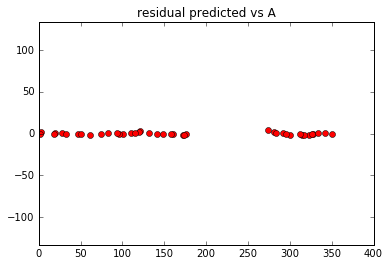

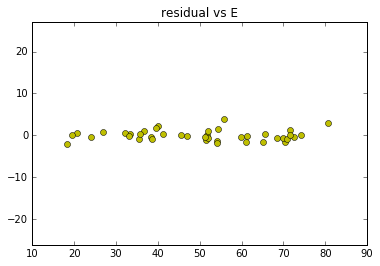

In [29]:
#residuals for training session
# dE vs Az
plt.plot(df.obs_az, (z-z_predicted_training)*10000, 'ro')
plt.axis('equal')
plt.title('residual predicted vs A')
plt.show()

# dE vs Alt
plt.plot(df.obs_alt, (z-z_predicted_training)*10000, 'yo')
plt.axis('equal')
plt.title('residual vs E')
plt.show()

In [30]:
regr2.coef_

array([ 0.00689635, -0.01341535, -0.00241806, -0.00489107, -0.00071711])

Net RMS error in arcsec is  3.12302908302
This is for test set


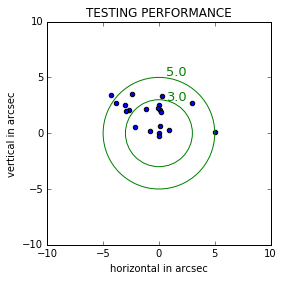

In [31]:
print("Net RMS error in arcsec is ", np.sqrt(np.square(dist_h_RMS) + np.square(dist_v_RMS))*3600)
print("This is for test set")
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(left=-0.6)
#ax.set_ylim(bottom=0.0)
ax.scatter((yt - y_predicted_test)*np.cos(dft.catalogue_alt)*3600, (zt - z_predicted_test)*3600)

# circles of 4 arc sec accuracy and 10 arc sec accuracy
circ1 = plt.Circle((0.0, 0.0), radius=3, color='g', fill=False)
circ2 = plt.Circle((0.0, 0.0), radius=5, color='g', fill=False)
ax.set_title('TESTING PERFORMANCE')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_xlabel('horizontal in arcsec')
ax.set_ylabel('vertical in arcsec')
ax.text(0.65, 2.95, '3.0', color='green', fontsize=13)
ax.text(0.65, 5.2, '5.0', color='green', fontsize=13)
ax.add_artist(circ1)
ax.add_artist(circ2)
plt.show()

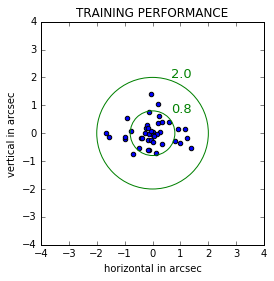

While training net error in arc sec is : 0.797283906911


In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(left=-0.6)
#ax.set_ylim(bottom=0.0)
ax.scatter((y - y_predicted_training)*np.cos(df.obs_alt)*3600, (z - z_predicted_training)*3600)

# circles of 4 arc sec accuracy and 10 arc sec accuracy
circ1 = plt.Circle((0.0, 0.0), radius=2, color='g', fill=False)
circ2 = plt.Circle((0.0, 0.0), radius=0.8, color='g', fill=False)
ax.set_title('TRAINING PERFORMANCE')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_xlabel('horizontal in arcsec')
ax.set_ylabel('vertical in arcsec')
ax.text(0.65, 0.75, '0.8', color='green', fontsize=13)
ax.text(0.65, 2.0, '2.0', color='green', fontsize=13)
ax.add_artist(circ1)
ax.add_artist(circ2)
plt.show()

# RMS Error for training set
h_ms_train = np.mean(np.square((y - y_predicted_training)*np.cos(df.obs_alt)))
v_ms_train = np.mean(np.square(z - z_predicted_training))

train_RMS = np.sqrt(h_ms_train + v_ms_train)*3600
print("While training net error in arc sec is :", train_RMS)

In [33]:
# RMS Error for training set
h_ms_train = np.mean(np.square((y - y_predicted_training)*np.cos(df.obs_alt)))
v_ms_train = np.mean(np.square(z - z_predicted_training))

train_RMS = np.sqrt(h_ms_train + v_ms_train)*3600
print("While training net error in arc sec is :", train_RMS)

While training net error in arc sec is : 0.797283906911


In [46]:
X_copy = X

In [51]:
X_copy = np.insert(X_copy, 0, 1.0, axis=1)

In [68]:
X_t = X_copy.T
XXt_inv = np.linalg.inv(np.dot(X_t, X_copy))
#print(XXt_inv.shape)
H = np.dot(X_copy, np.dot(XXt_inv, X_t))
MSE_y_train = (np.sum(np.square(y - y_predicted_training)) / (41 - 4 - 1) )
var_res_y_train = (MSE_y_train)*(np.eye(41,41) - H)
print(var_res_y_train)
print(np.diagonal(var_res_y_train, axis1=0, axis2=1))

[[  1.21843591e-07  -8.96605610e-09  -6.48072723e-09 ...,  -6.65160753e-09
   -1.07090928e-08  -6.27440518e-09]
 [ -8.96605610e-09   1.19517573e-07  -7.58409635e-09 ...,   1.01085343e-10
   -9.65406277e-13   2.79723889e-09]
 [ -6.48072723e-09  -7.58409635e-09   1.26285381e-07 ...,  -3.69469246e-09
   -2.18815739e-09  -6.32459816e-10]
 ..., 
 [ -6.65160753e-09   1.01085343e-10  -3.69469246e-09 ...,   1.16132223e-07
   -1.74059619e-08  -1.85970892e-08]
 [ -1.07090928e-08  -9.65406277e-13  -2.18815739e-09 ...,  -1.74059619e-08
    1.00892663e-07  -2.83368468e-08]
 [ -6.27440518e-09   2.79723889e-09  -6.32459816e-10 ...,  -1.85970892e-08
   -2.83368468e-08   9.99583183e-08]]
[  1.21843591e-07   1.19517573e-07   1.26285381e-07   1.20727466e-07
   1.20190476e-07   1.13356113e-07   8.68858751e-08   1.13352237e-07
   9.84059139e-08   1.18520356e-07   1.21015326e-07   1.22049633e-07
   1.10619688e-07   1.06913807e-07   1.26908830e-07   2.61367794e-08
   1.08620045e-07   1.18693919e-07   1.22862

In [57]:
# CONCLUSION ==> residuals behave very much like our assumption. ~ 0 mean, ~ constant variance, ~ independent

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [70]:
y - y_predicted_training

array([  2.10379149e-04,   1.42597385e-04,   2.58606208e-04,
         5.67071740e-06,   4.56326236e-05,  -2.07278126e-05,
        -2.00064289e-04,  -2.17792157e-04,  -1.60198657e-04,
        -5.28157601e-05,   3.56156193e-04,   5.00243537e-04,
         4.94692019e-04,   9.17154519e-05,   4.27428604e-04,
         8.93292719e-05,  -3.87304201e-04,  -4.28400211e-05,
         1.00870169e-04,   3.75955930e-04,   5.78788739e-04,
         3.61544031e-04,  -4.94932891e-04,  -4.54447290e-04,
        -2.20837389e-04,   2.77514991e-04,   4.40199233e-04,
        -4.62314513e-05,  -2.81831685e-04,   1.42489826e-05,
        -5.98488725e-05,  -4.17712206e-05,  -4.32589168e-05,
        -2.43783213e-04,  -7.11866875e-04,  -8.97136959e-04,
        -1.84716583e-04,  -4.10695910e-04,  -3.23479577e-04,
         1.11049080e-04,   6.13959417e-04])

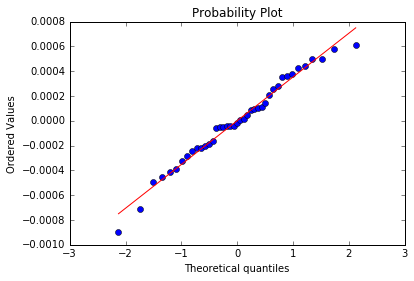

In [77]:
from scipy import stats


stats.probplot(y - y_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

# Approximately normally distributed residuals with bad outliers

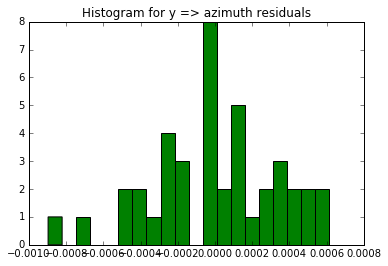

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((y - y_predicted_training), bins=20, color='green')
#ax.set_xlim([-10, 10])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for y => azimuth residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

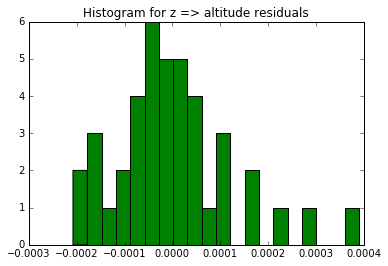

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
dist_tuple = ax.hist((z - z_predicted_training), bins=20, color='green')
#ax.set_xlim([-5, 5])
#ax.set_ylim([0, 10])
ax.set_title('Histogram for z => altitude residuals')
#ax.set_aspect('equal', adjustable='box')
plt.show()

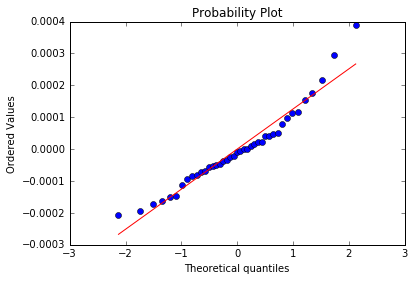

In [108]:
stats.probplot(z - z_predicted_training, dist='norm', plot=plt.figure().add_subplot(111))
#plt.axis('equal')
plt.show()

# severe deviations from normality.